# GridSearch CV implementation

This notebook consists of classifying MBTI types using 


1.   Support Vector Machine
2.   Random Classifier
3.   Logistic Regression
4.   Decision Tree


These 4 algorthims have been tested using 8 cross validation folds with various hyperparameters

All training examples were used regardless of proportion of class sizes. 



In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.express as px
from sklearn.metrics import accuracy_score as acs
import warnings
from sklearn.metrics import accuracy_score as acs
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [2]:
!git clone https://github.com/placid-brain/CDS-Project-2021.git

Cloning into 'CDS-Project-2021'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 196 (delta 61), reused 119 (delta 27), pack-reused 0
Receiving objects: 100% (196/196), 183.75 MiB | 25.68 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Checking out files: 100% (53/53), done.


In [3]:
df = pd.read_csv("/content/CDS-Project-2021/personality_dataset/mbti_basic_cleaned_dataset.csv")
df.head()

,type,posts
0,INFJ,enfp intj moments sportscenter top ten plays p...
1,ENTP,finding lack posts alarming sex boring positio...
2,INTP,good one course say know blessing curse absolu...
3,INTJ,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,fired another silly misconception approaching ...


In [4]:
df["type"].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [5]:
train_df, test_df = train_test_split(df,test_size=0.3,random_state=42,stratify=df.type )

In [6]:


train_df_index_list=list(train_df.index)

test_df_index_list=list(test_df.index)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizer = CountVectorizer()
  
vectorizer.fit(df)

train_df.posts.values.astype('U')
test_df.posts.values.astype('U')

train_df_vector = vectorizer.transform(train_df.posts.values.astype('U')).toarray()

test_df_vector = vectorizer.transform(test_df.posts.values.astype('U')).toarray()

print(train_df_vector.shape)
print(test_df_vector.shape)

(6072, 2)
(2603, 2)


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


train_df_target = le.fit_transform(train_df.type)
test_df_target = le.fit_transform(test_df.type)

print(train_df_target.shape)
print(test_df_target.shape)

(6072,)
(2603,)


In [9]:
accuracy_record={}

## Support Vector Machine



1.   Training Sample Distribution
2.   Testing Sample Distribution
3.   Grid Search Implementation
4.   Displaying of results in dataframe
5.   Recording accuracy of SVM in accuracy record



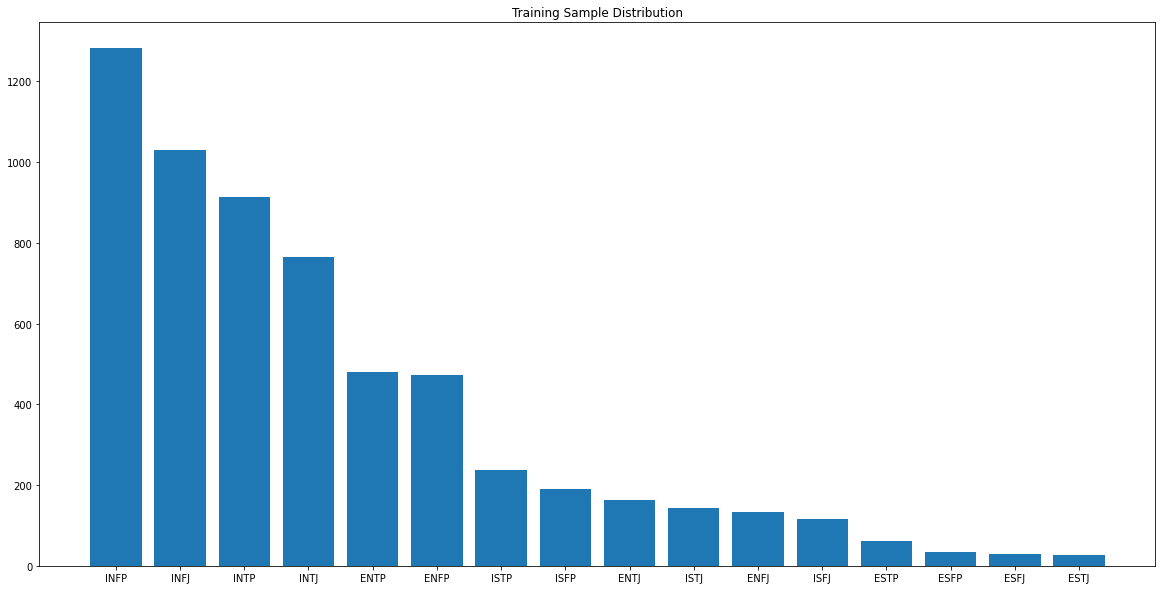

In [10]:
# 1

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(20,10))



train_label_df=pd.DataFrame(train_df['type'].value_counts())



plt.bar(train_label_df.index, train_label_df['type'])
plt.title("Training Sample Distribution")
plt.show()

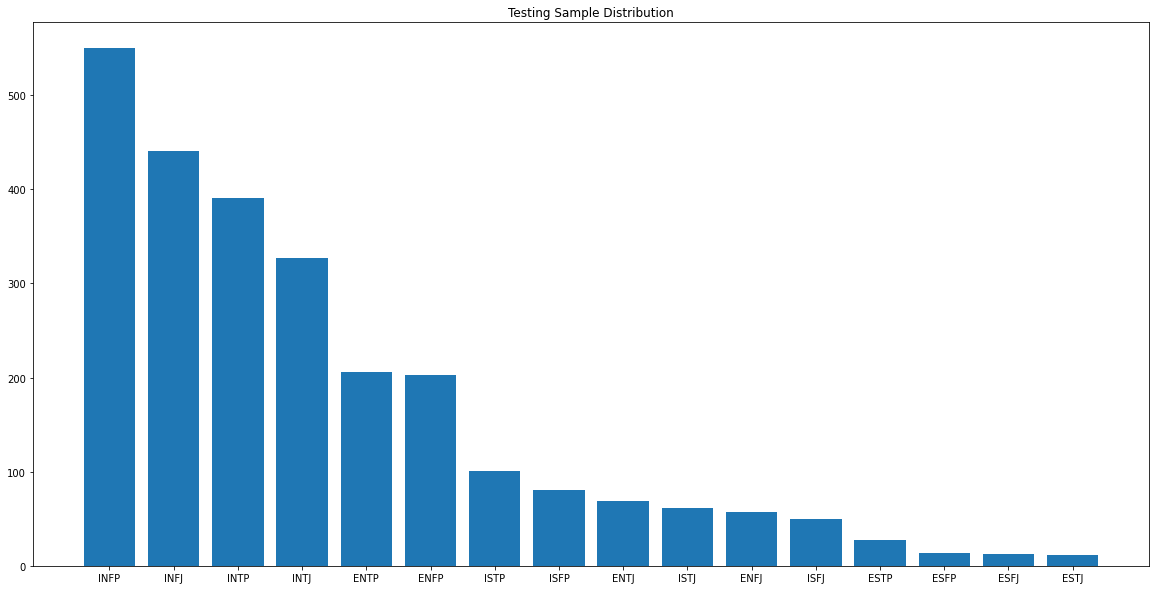

In [11]:
# 2



f, ax = plt.subplots(figsize=(20,10))



test_label_df=pd.DataFrame(test_df['type'].value_counts())



plt.bar(test_label_df.index, test_label_df['type'])
plt.title("Testing Sample Distribution")
plt.show()

In [12]:
# 3


clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=8, return_train_score=False)
clf.fit(train_df_vector, train_df_target)



GridSearchCV(cv=8, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [13]:
# 4

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score
0,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.216074,0.218709,0.218709,0.202899,0.206851,0.210804,0.212121,0.214756,0.212615
1,1,linear,"{'C': 1, 'kernel': 'linear'}",0.212121,0.212121,0.210804,0.213439,0.210804,0.204216,0.205534,0.208169,0.209651
2,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.214756,0.223979,0.217391,0.204216,0.198946,0.206851,0.209486,0.222661,0.212286
3,10,linear,"{'C': 10, 'kernel': 'linear'}",0.212121,0.212121,0.210804,0.213439,0.210804,0.204216,0.205534,0.208169,0.209651
4,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.216074,0.223979,0.212121,0.204216,0.200264,0.206851,0.213439,0.217391,0.211792
5,20,linear,"{'C': 20, 'kernel': 'linear'}",0.212121,0.212121,0.210804,0.213439,0.210804,0.204216,0.205534,0.208169,0.209651


In [14]:
# 5

i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]




C = int(result_df.iloc[i,0])
kernel = str(result_df.iloc[i,1])
svm = SVC(C=C,kernel=kernel,gamma='auto')
svm.fit(train_df_vector,train_df_target)
target_pred = svm.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Support Vector Machine"] = acs

print(accuracy_record)



{'Support Vector Machine': 0.21091048789857855}


## Random Classifier

3.   Grid Search Implementation
4.   Displaying of results in dataframe
5.   Recording accuracy of Random Classifier in accuracy record


In [15]:
#3

param_grid = {
    
    
    'max_depth': [80, 90,100,110],
    'max_features': [2,3],
    'min_samples_leaf': [3],
    'min_samples_split': [8,10,12],
    'n_estimators': [100]
}
 

rf = RandomForestClassifier()


clf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 8, n_jobs = -1, verbose = 2, return_train_score=False)
clf.fit(train_df_vector, train_df_target)



Fitting 8 folds for each of 24 candidates, totalling 192 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/pa

GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100]},
             verbose=2)

In [16]:
# 4
print(train_df_vector.shape)
print(test_df_vector.shape)
drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

(6072, 2)
(2603, 2)


,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score
0,80,2,3,8,100,"{'max_depth': 80, 'max_features': 2, 'min_samp...",0.217391,0.223979,0.214756,0.204216,0.194993,0.206851,0.214756,0.212121,0.211133
1,80,2,3,10,100,"{'max_depth': 80, 'max_features': 2, 'min_samp...",0.214756,0.223979,0.212121,0.204216,0.194993,0.208169,0.214756,0.214756,0.210968
2,80,2,3,12,100,"{'max_depth': 80, 'max_features': 2, 'min_samp...",0.216074,0.223979,0.213439,0.204216,0.192358,0.208169,0.213439,0.216074,0.210968
3,80,3,3,8,100,"{'max_depth': 80, 'max_features': 3, 'min_samp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80,3,3,10,100,"{'max_depth': 80, 'max_features': 3, 'min_samp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,80,3,3,12,100,"{'max_depth': 80, 'max_features': 3, 'min_samp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,90,2,3,8,100,"{'max_depth': 90, 'max_features': 2, 'min_samp...",0.213439,0.218709,0.193676,0.204216,0.194993,0.208169,0.212121,0.210804,0.207016
7,90,2,3,10,100,"{'max_depth': 90, 'max_features': 2, 'min_samp...",0.213439,0.225296,0.194993,0.205534,0.194993,0.206851,0.213439,0.213439,0.208498
8,90,2,3,12,100,"{'max_depth': 90, 'max_features': 2, 'min_samp...",0.216074,0.223979,0.214756,0.202899,0.201581,0.206851,0.213439,0.213439,0.211627
9,90,3,3,8,100,"{'max_depth': 90, 'max_features': 3, 'min_samp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# 5

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]



max_depth = int(result_df.iloc[i,0])
max_features= int(result_df.iloc[i,1])
min_samples_leaf= int(result_df.iloc[i,2])
min_samples_split= int(result_df.iloc[i,3])
n_estimators= int(result_df.iloc[i,4])


rf = RandomForestClassifier(max_depth=max_depth ,max_features = max_features, min_samples_leaf=min_samples_leaf )
rf.fit(train_df_vector,train_df_target)

target_pred = rf.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Random Forest"] = acs

print(accuracy_record)



{'Support Vector Machine': 0.21091048789857855, 'Random Forest': 0.20783711102573954}


## Logistic Regression

3. Grid Search Implementation
4. Displaying of results in dataframe
5. Recording accuracy of Random Classifier in accuracy record

In [18]:
# 3

from sklearn.linear_model import LogisticRegression

param_grid= {
    "C":[1,5,10],
    "penalty":["l1","l2","elasticnet","none"],
    "solver":["saga"]
}
lr = LogisticRegression()

clf = GridSearchCV(lr, param_grid, cv=8)
clf.fit(train_df_vector, train_df_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga']})

In [19]:
# 4
print(train_df_vector.shape)
print(test_df_vector.shape)
drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

(6072, 2)
(2603, 2)


,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score
0,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.208169,0.208169,0.210804,0.213768
1,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
2,1,elasticnet,saga,"{'C': 1, 'penalty': 'elasticnet', 'solver': 's...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,none,saga,"{'C': 1, 'penalty': 'none', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
4,5,l1,saga,"{'C': 5, 'penalty': 'l1', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
5,5,l2,saga,"{'C': 5, 'penalty': 'l2', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
6,5,elasticnet,saga,"{'C': 5, 'penalty': 'elasticnet', 'solver': 's...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,none,saga,"{'C': 5, 'penalty': 'none', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
8,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
9,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933


In [20]:
# 5

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]



C = int(result_df.iloc[i,0])
penalty =str(result_df.iloc[i,1])
solver= str(result_df.iloc[i,2])


lr = LogisticRegression(C=C, penalty= penalty, solver= solver)
lr.fit(train_df_vector,train_df_target)

target_pred = lr.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Logistic Regression"] = acs

print(accuracy_record)



{'Support Vector Machine': 0.21091048789857855, 'Random Forest': 0.20783711102573954, 'Logistic Regression': 0.20898962735305418}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



## Decision Trees

3. Grid Search Implementation
4. Displaying of results in dataframe
5. Recording accuracy of Random Classifier in accuracy record

In [21]:
# 3

from sklearn.tree import DecisionTreeClassifier

param_grid={
    
    'max_depth': [80, 90,100,110],
    'max_features': [2,3],
    'min_samples_leaf': [3],
    'min_samples_split': [8,10,12],
    'random_state': [42,20,10],
    'max_leaf_nodes': [2,3,4]
    
    
}

dt = DecisionTreeClassifier()
print(dt.get_params(deep=True))

clf = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 8, verbose = 2, return_train_score=False)

clf.fit(train_df_vector,train_df_target)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Fitting 8 folds for each of 216 candidates, totalling 1728 fits
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


864 fits failed out of a total of 1728.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in 

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [3],
                         'min_samples_split': [8, 10, 12],
                         'random_state': [42, 20, 10]},
             verbose=2)

In [22]:
# 4
print(train_df_vector.shape)
print(test_df_vector.shape)
drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

(6072, 2)
(2603, 2)


,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score
0,80,2,2,3,8,42,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.212121,0.212121,0.210804,0.210804,0.210804,0.205534,0.210804,0.197628,0.208827
1,80,2,2,3,8,20,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.212121,0.212121,0.210804,0.210804,0.210804,0.205534,0.210804,0.197628,0.208827
2,80,2,2,3,8,10,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.212121,0.212121,0.210804,0.210804,0.210804,0.205534,0.210804,0.197628,0.208827
3,80,2,2,3,10,42,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.212121,0.212121,0.210804,0.210804,0.210804,0.205534,0.210804,0.197628,0.208827
4,80,2,2,3,10,20,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.212121,0.212121,0.210804,0.210804,0.210804,0.205534,0.210804,0.197628,0.208827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,110,3,4,3,10,20,"{'max_depth': 110, 'max_features': 3, 'max_lea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,110,3,4,3,10,10,"{'max_depth': 110, 'max_features': 3, 'max_lea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,110,3,4,3,12,42,"{'max_depth': 110, 'max_features': 3, 'max_lea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,110,3,4,3,12,20,"{'max_depth': 110, 'max_features': 3, 'max_lea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# 5

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]
print(i)


max_depth = int(result_df.iloc[i,0])
max_features= int(result_df.iloc[i,1])
min_samples_leaf= int(result_df.iloc[i,2])
min_samples_split= int(result_df.iloc[i,3])
random_state= int(result_df.iloc[i,4])
max_leaf_nodes=int(result_df.iloc[i,5])


dt = DecisionTreeClassifier(max_depth=max_depth ,max_features = max_features, min_samples_leaf=min_samples_leaf,min_samples_split= min_samples_split ,random_state=random_state,   max_leaf_nodes=max_leaf_nodes )
dt.fit(train_df_vector,train_df_target)

target_pred = dt.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Decision Tree"] = acs

print(accuracy_record)



18
{'Support Vector Machine': 0.21091048789857855, 'Random Forest': 0.20783711102573954, 'Logistic Regression': 0.20898962735305418, 'Decision Tree': 0.20937379946215906}
